In [97]:
import pandas as pd
import missingno as msno
import matplotlib


In [98]:
print("Matplotlib config dir:", matplotlib.get_configdir())
print("Matplotlib cache dir:", matplotlib.get_cachedir())

Matplotlib config dir: C:\Users\cohen\.matplotlib
Matplotlib cache dir: C:\Users\cohen\.matplotlib


In [89]:
df = pd.read_csv('./dash_app/assets/societes.csv')
df2 = pd.read_csv('entreprises_completes.csv')
df3 = pd.read_csv('merged_df.csv')

In [90]:
df['Sous-Catégorie']

0        Industrie Culturelle et Créative|IoT|Software ...
1                   Fintech|Marketplace & E-commerce|Santé
2                                             Électronique
3              FoodTech|Industrie|Marketplace & E-commerce
4                                 Marketplace & E-commerce
                               ...                        
14330                                               Divers
14331    Fintech|FoodTech|Marketplace & E-commerce|Soft...
14332                                     Software / Cyber
14333                     Industrie Culturelle et Créative
14334                       Agriculture|FoodTech|Industrie
Name: Sous-Catégorie, Length: 14335, dtype: object

In [ ]:
df = df['Sous-Catégorie'].apply(lambda x: x.split("|") if isinstance(x, str) else [])

0        [Industrie Culturelle et Créative, IoT, Softwa...
1               [Fintech, Marketplace & E-commerce, Santé]
2                                           [Électronique]
3          [FoodTech, Industrie, Marketplace & E-commerce]
4                               [Marketplace & E-commerce]
                               ...                        
14330                                             [Divers]
14331    [Fintech, FoodTech, Marketplace & E-commerce, ...
14332                                   [Software / Cyber]
14333                   [Industrie Culturelle et Créative]
14334                   [Agriculture, FoodTech, Industrie]
Name: Sous-Catégorie, Length: 14335, dtype: object

In [96]:
top = df.explode().value_counts().to_frame().reset_index().rename(columns={'index': 'Sous-Catégorie', 'Sous-Catégorie': 'Nombre de sociétés'})

0        [Industrie Culturelle et Créative, IoT, Softwa...
1               [Fintech, Marketplace & E-commerce, Santé]
2                                           [Électronique]
3          [FoodTech, Industrie, Marketplace & E-commerce]
4                               [Marketplace & E-commerce]
                               ...                        
14330                                             [Divers]
14331    [Fintech, FoodTech, Marketplace & E-commerce, ...
14332                                   [Software / Cyber]
14333                   [Industrie Culturelle et Créative]
14334                   [Agriculture, FoodTech, Industrie]
Name: Sous-Catégorie, Length: 14335, dtype: object

In [73]:
keyword = df3['mots_cles_def']

In [78]:
keyword.count()

14505

In [79]:
df['mots_cles_def'] = df['mots_cles_def'].fillna('')
# Fusionner les mots-clés de toutes les lignes en une seule grande chaîne
all_keywords = ','.join(df['mots_cles_def'].astype(str))
# Diviser les mots-clés en une liste de mots individuels
keywords_list = [keyword.strip() for keyword in all_keywords.split(',') if keyword.strip()]

In [80]:
from collections import Counter
# Étape 4 : Utiliser Counter pour compter la fréquence des mots-clés
keywords_freq = Counter(keywords_list)
# Étape 5 : Convertir le résultat en DataFrame trié
keywords_df = pd.DataFrame(keywords_freq.items(), columns=['Mot', 'Count']).sort_values(by='Count', ascending=False)
# Afficher les mots-clés les plus fréquents
keywords_df

,Mot,Count
24,),2467
51,'saas',2252
108,'commission',1343
17,'manufacturing',1264
102,'artificial intelligence',1188
...,...,...
2519,'mobilitépartagée',1
2520,'transporturbain',1
2521,'scanner',1
2523,'hevtol',1


In [70]:
keywords_df.to_csv('keywords_save.csv', index=False)

In [61]:
keywords_list

['infrastructures du numérique',
 'icc',
 'iot',
 'microélectronique',
 'logiciel',
 'mesh networks',
 'commission',
 'fintech',
 'insurance',
 'marketplace & ecommerce',
 'bc',
 'hosting',
 'semiconductors',
 'bc',
 'food',
 'home living',
 'in-store retail & restaurant tech',
 'kitchen & cooking tech',
 'manufacturing',
 'marketplace & ecommerce',
 'selling own inventory',
 'marketplace & ecommerce',
 'subscription',
 'travel',
 'habitat',
 'home living',
 'telecommunications',
 'santé',
 'e-commerce',
 'marketplace',
 'marketplace & ecommerce',
 'wellness beauty',
 'telecom',
 'bretagne',
 'bb',
 'fashion',
 'manufacturing',
 'selling own inventory',
 'bb',
 'bordeaux',
 'nouvelle-aquitaine',
 'gironde',
 'big data',
 'subscription',
 'energy',
 'media',
 'vente  service client',
 'software',
 'bb',
 'martech adtech salestech',
 'marketing  communication',
 'fashion',
 'manufacturing',
 'selling own inventory',
 'home living',
 'abonnement',
 'influence',
 'subscription',
 'telecom'

<Axes: >

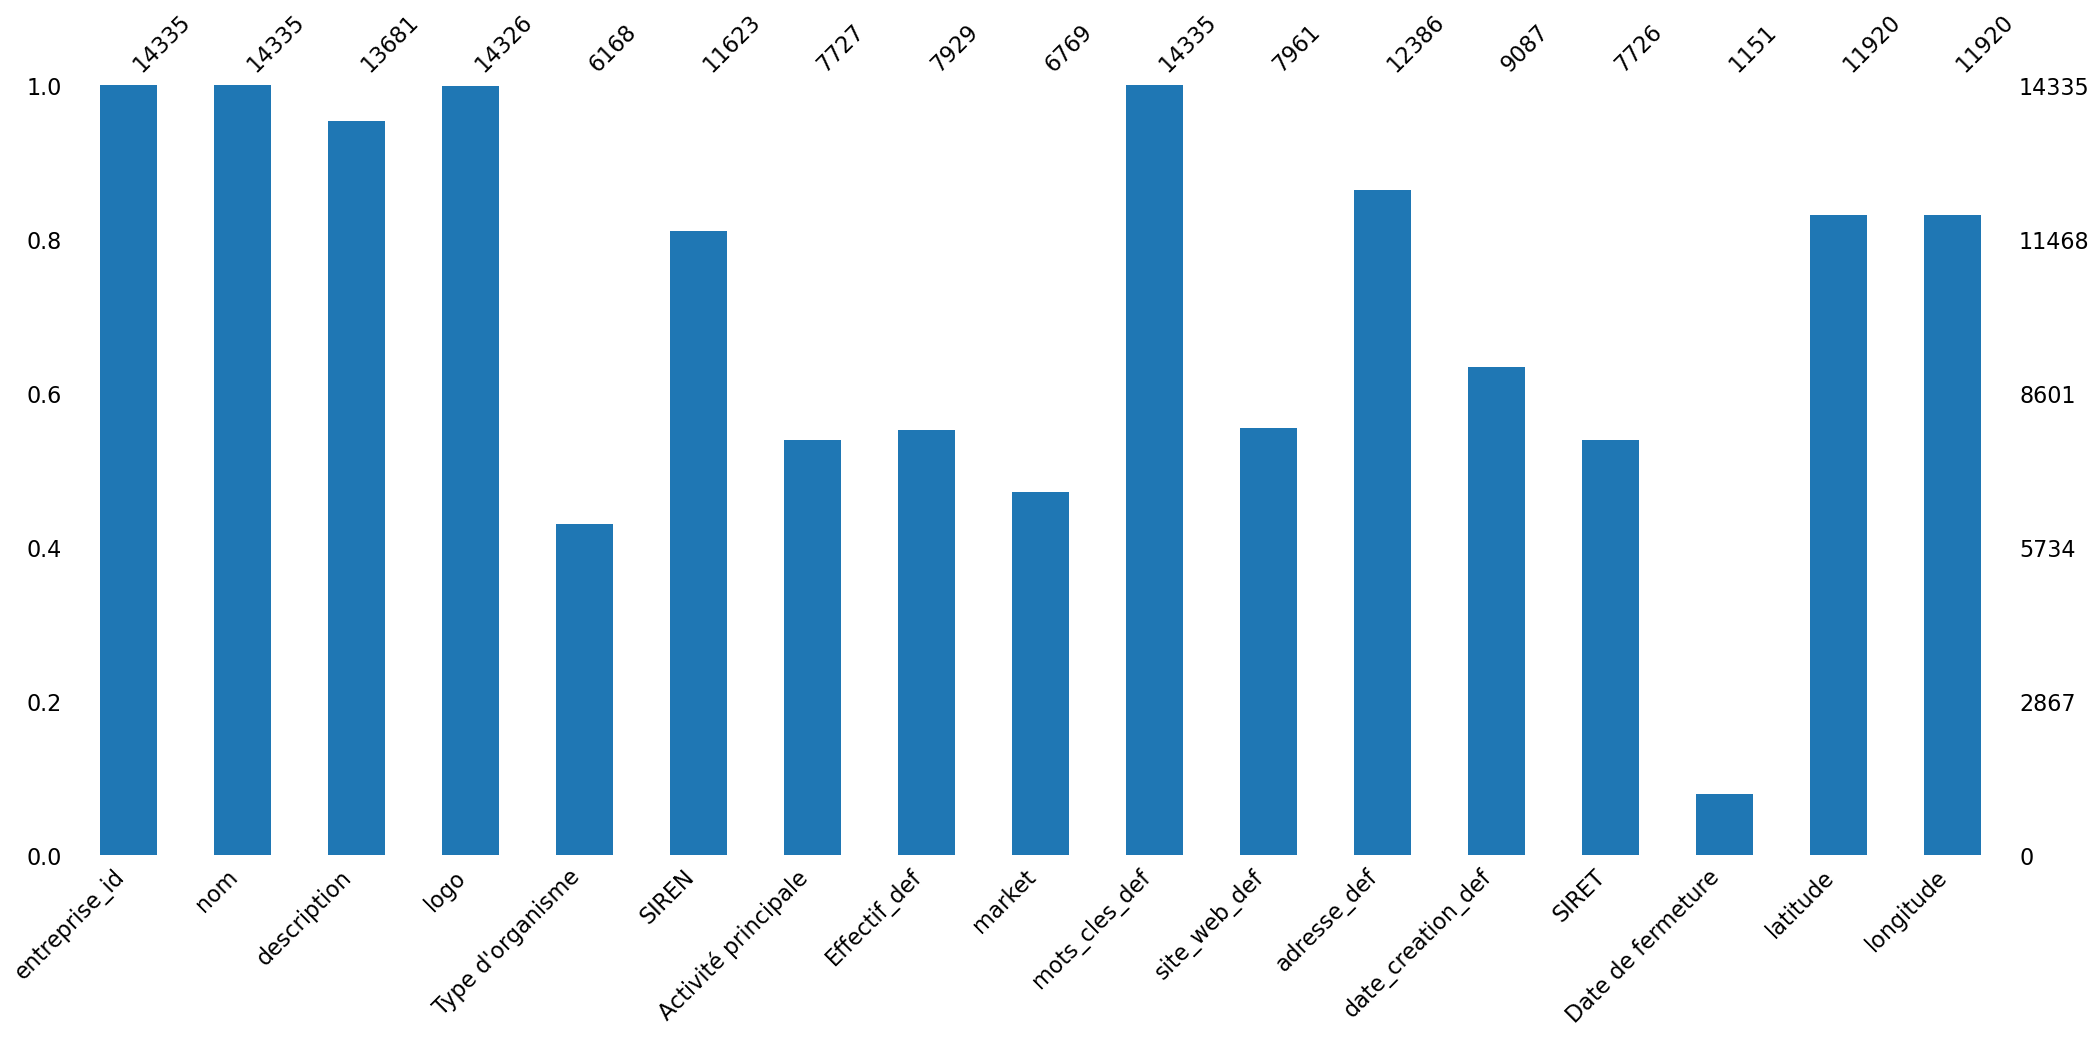

In [62]:
msno.bar(df, color='#1f77b4')

<Axes: >

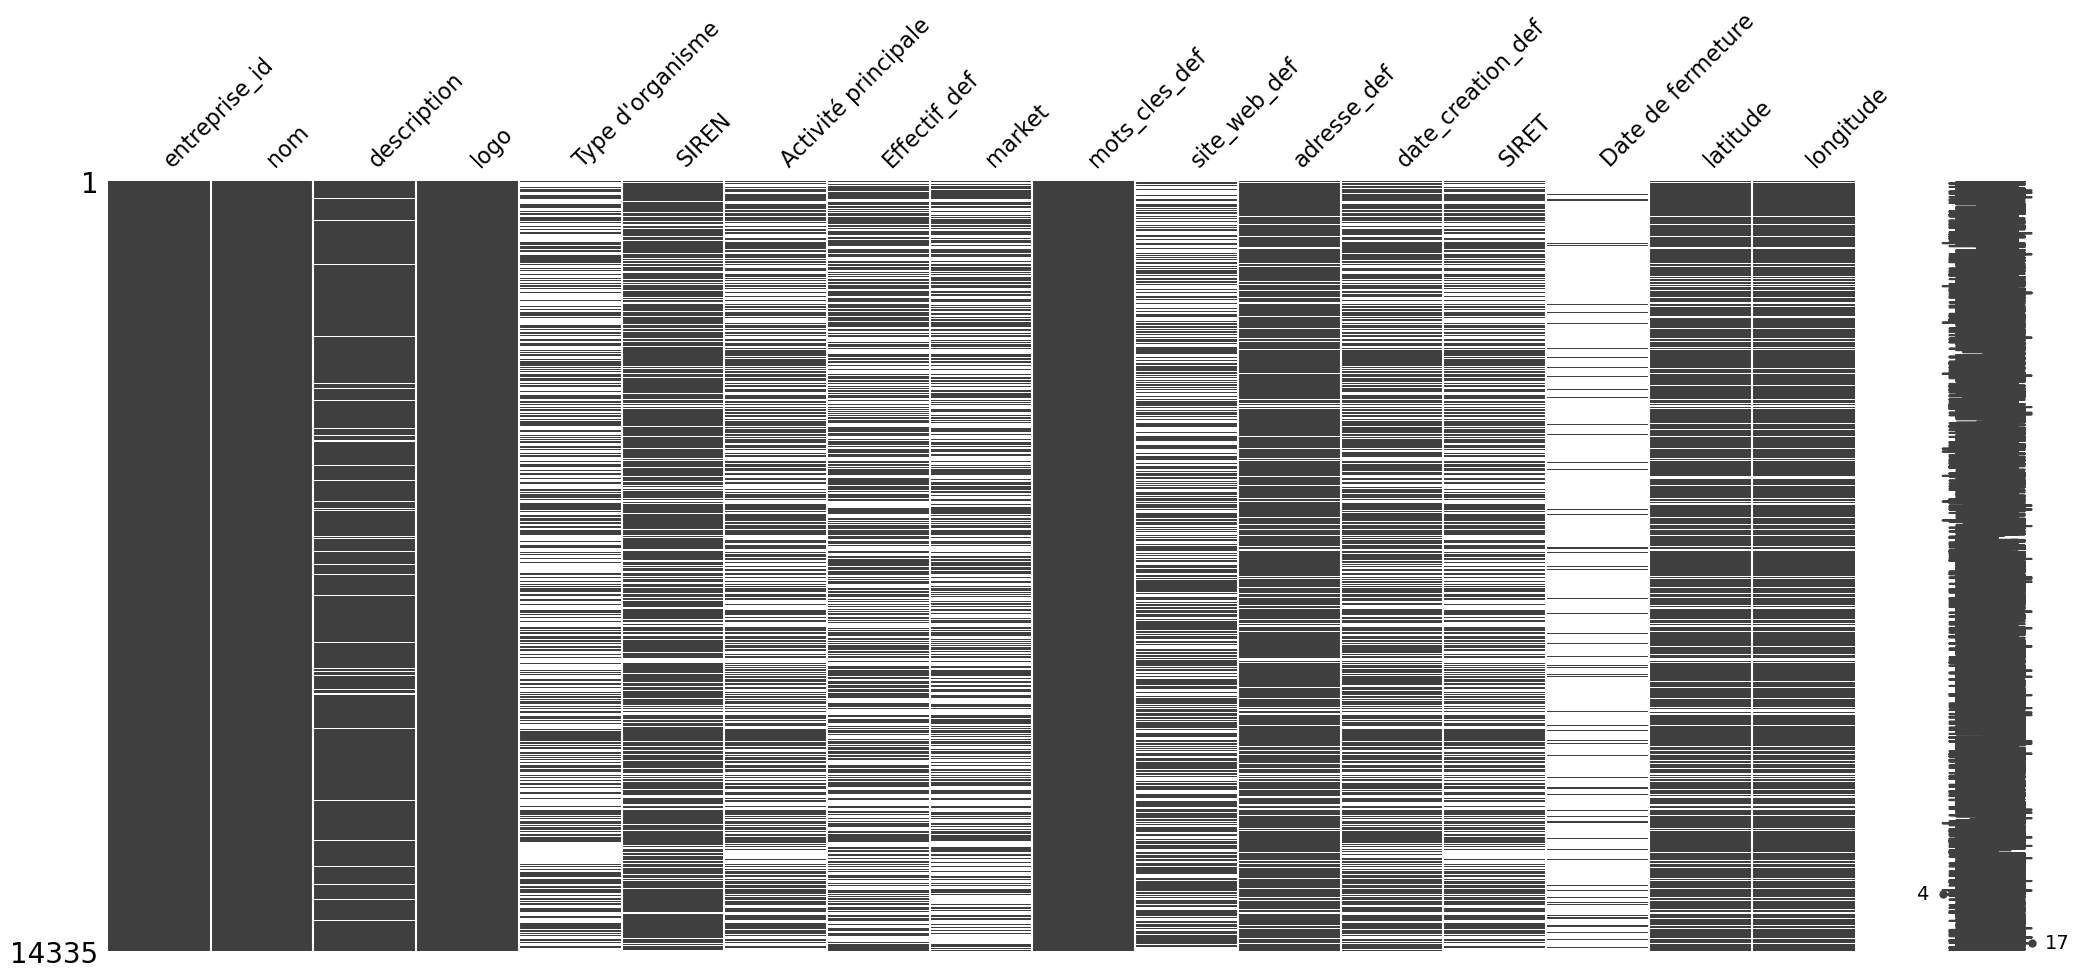

In [63]:
msno.matrix(df) 

<Axes: >

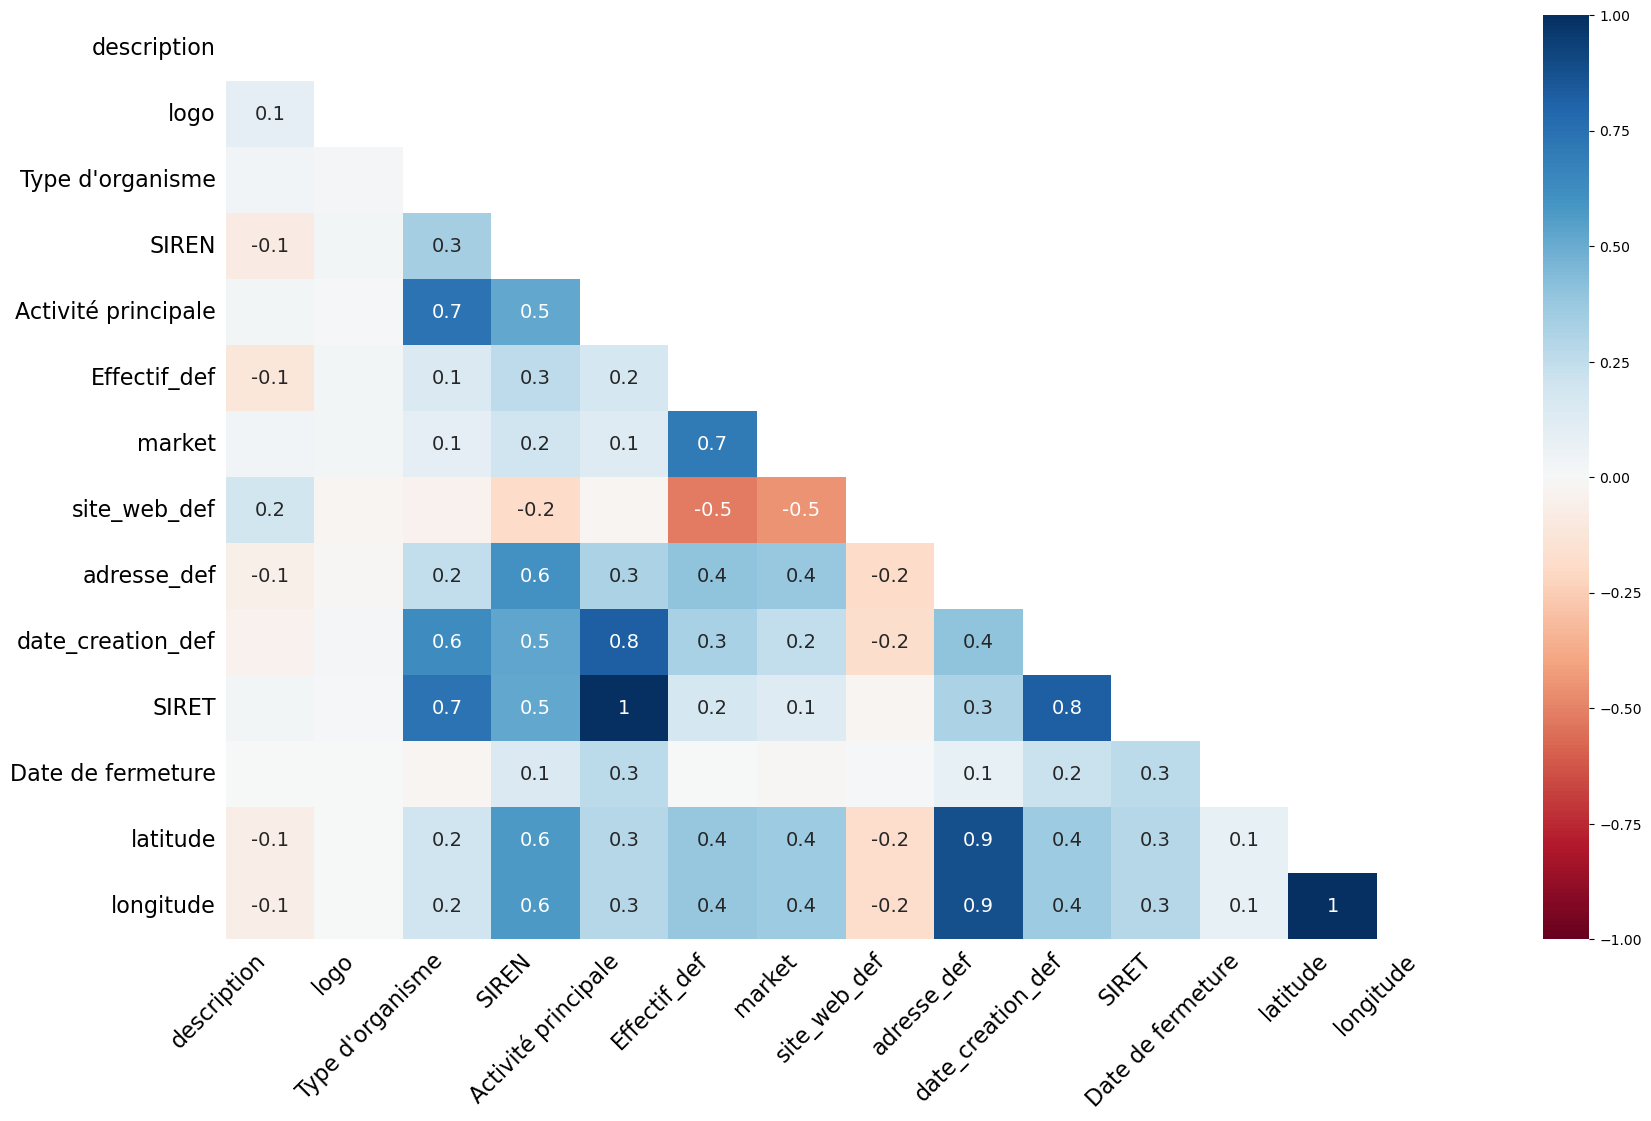

In [64]:
msno.heatmap(df)

<Axes: >

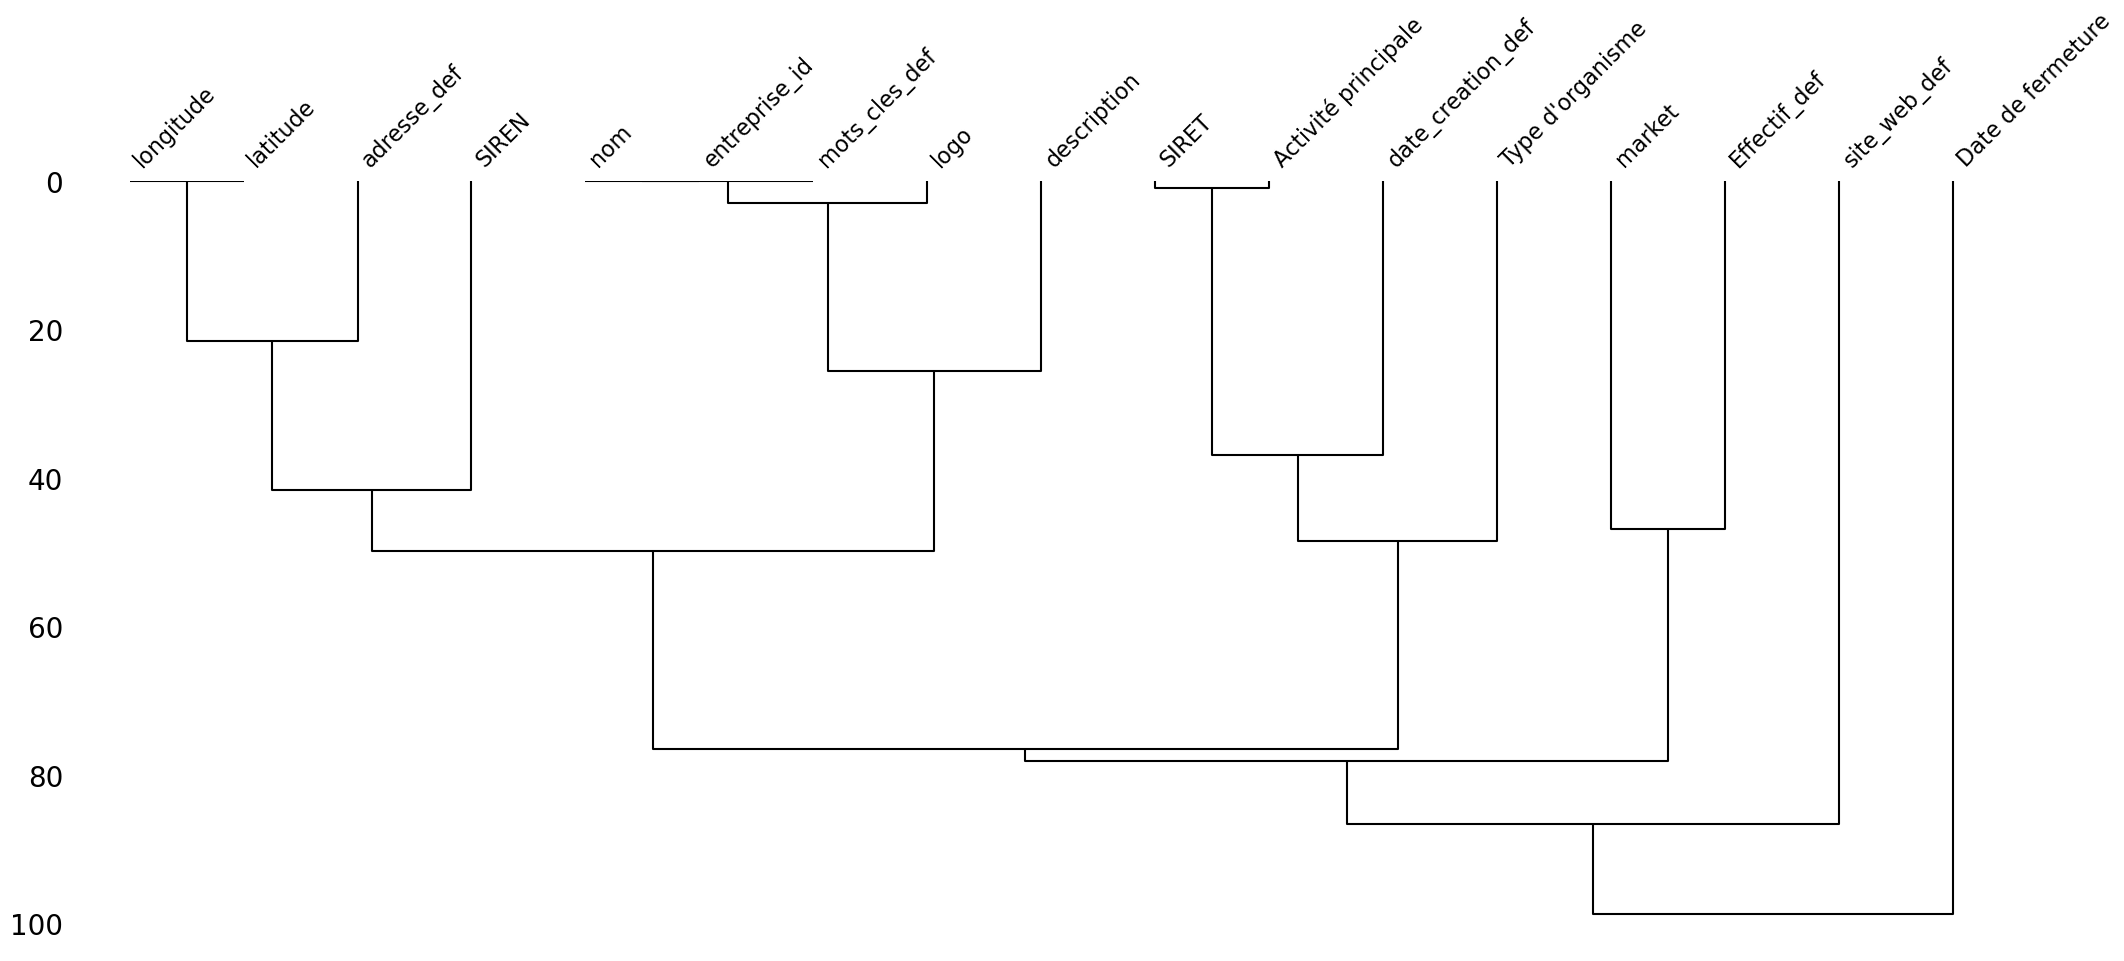

In [65]:
msno.dendrogram(df) 

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
entreprise_id,14335.0,7.168000e+03,4.138302e+03,1.000000e+00,3.584500e+03,7.168000e+03,1.075150e+04,1.433500e+04
SIRET,7726.0,7.347448e+13,1.899344e+13,1.831002e+13,5.222110e+13,8.189808e+13,8.802430e+13,9.878324e+13
latitude,11920.0,4.668457e+01,6.531463e+00,-4.128880e+01,4.573827e+01,4.883194e+01,4.886681e+01,6.149802e+01
longitude,11920.0,3.875585e+00,1.768984e+01,-1.494452e+02,2.247743e+00,2.320041e+00,4.013311e+00,1.747772e+02


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14335 entries, 0 to 14334
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entreprise_id        14335 non-null  int64  
 1   nom                  14335 non-null  object 
 2   description          13681 non-null  object 
 3   logo                 14326 non-null  object 
 4   Type d'organisme     6168 non-null   object 
 5   SIREN                11623 non-null  object 
 6   Activité principale  7727 non-null   object 
 7   Effectif_def         7929 non-null   object 
 8   market               6769 non-null   object 
 9   mots_cles_def        14335 non-null  object 
 10  site_web_def         7961 non-null   object 
 11  adresse_def          12386 non-null  object 
 12  date_creation_def    9087 non-null   object 
 13  SIRET                7726 non-null   float64
 14  Date de fermeture    1151 non-null   object 
 15  latitude             11920 non-null 

In [68]:
find_siren

NameError: name 'find_siren' is not defined

In [ ]:
df_siren = df[(df['SIREN'] != 'Non disponible') & (~df['SIREN'].isna())]

In [ ]:
df2

,Unnamed: 0,nom,description,logo,Date dernier financement,Série,LinkedIn,Type d'organisme,Activité principale,market,...,Commune,Adresse complète,Date de création,Date de fermeture,Effectif salarié,Code NAF,Catégorie entreprise,Dirigeant principal,Coordonnée Lambert X,Coordonnée Lambert Y
0,5,1001-ARCHITECTURES,1001 Façons de sublimer votre espace de vie,https://d3kqkuy1hpjocx.cloudfront.net/s3fs-pub...,NaN,NaN,NaN,NaN,NaN,NaN,...,GAMBSHEIM,2b Rue des Marronniers 67760 Gambsheim,2018-08-01,NaN,01,59.11A,PME,MINGOT LUDOVIC ROBERT / PELEGRY STEPHANE,48.695699,7.890119
1,7,1001PHARMACIES,Achetez sur internet chez les pharmacies franç...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,64.20Z,B2C,...,PARIS,128 Rue la Boétie 75008 Paris,2015-06-09,NaN,NaN,64.20Z,PME,BOULEUC FREDERIC / BOURDEAU DE FONTENAY MIGUEL...,48.870938,2.305917
2,8,100M,100M simplifie la production du reporting trad...,https://upload.prd.hbd.cloud.bpifrance.fr/star...,NaN,NaN,NaN,NaN,58.29A,NaN,...,PARIS 2,NaN,2016-09-30,2019-08-31,NaN,58.29A,NaN,NaN,NaN,NaN
3,9,1083,Manufacture jeans and shoes in France,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,NaN,B2C,...,ROMANS-SUR-ISERE,49 Avenue Gambetta 26100 Romans-sur-Isère,2014-08-27,NaN,11,47.71Z,PME,HURIEZ GREGOIRE CLAUDE / HURIEZ THOMAS CLAUDE,45.045220,5.060032
4,10,10H11,10h11 est une société technologique dans l’opt...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,58.29C,B2C,...,BORDEAUX,88 Rue Judaïque 33000 Bordeaux,2011-03-07,NaN,02,58.29C,PME,DAUBERT JULIEN JEAN ROGER / /,44.841200,-0.586156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,14330,ZORBA,Bringing purpose to stories while exploring li...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,NaN,B2B,...,EVRY-COURCOURONNES,45 Boulevard Decauville 91000 Évry-Courcouronnes,1987-09-21,2021-11-22,NaN,56.10A,NaN,IPEK MUSTAFA,48.638029,2.438267
7739,14332,ZOZIO,The first digital companion of the industrial ...,https://maddyness.twic.pics/2022/05/Capture-de...,2022-01-05,Amorçage,NaN,NaN,62.02A,B2B,...,ALEMBON,441 Rue du Ventus 62850 Alembon,2018-11-14,NaN,NaN,62.02A,PME,HERDIER KEVIN JEAN-PHILIPPE,50.799317,1.881175
7740,14336,ZYGON,Comprehensive SaaS security solution offering ...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,NaN,B2B,...,CAEN,NaN,2023-07-11,NaN,NaN,62.01Z,NaN,NaN,49.174249,-0.347644
7741,14338,ZYL,Zyl (anciennement Comet) est une application m...,https://maddyness.twic.pics/2019/09/Logo-Zyl.p...,NaN,NaN,NaN,NaN,14.13Z,NaN,...,SAMOREAU,48 Voie de la Liberté 77210 Samoreau,2019-10-29,NaN,NaN,14.13Z,PME,ZYLBERBERG (ZYLBERBERG) ARNAUD,48.429191,2.757514


In [ ]:
df_siren.to_csv('api_siren_final.csv')

In [ ]:
df['SIREN'].value_counts()

Non disponible    3902
431857317            4
494855406            4
377550249            4
379548001            4
                  ... 
910918291            1
901039644            1
334027141            1
844955658            1
845183110            1
Name: SIREN, Length: 7701, dtype: int64

In [ ]:
df['SIREN'].isna().sum()

2712

In [ ]:
df_siren

,nom,description,logo,Date dernier financement,Série,LinkedIn,Type d'organisme,Activité principale,market,valeur_entreprise,mots_cles_def,Effectif_def,site_web_def,adresse_def,date_creation_def,Nom,Prenom,Poste,Montant_def,SIREN
5,1001-ARCHITECTURES,1001 Façons de sublimer votre espace de vie,https://d3kqkuy1hpjocx.cloudfront.net/s3fs-pub...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,habitat,NaN,https://1001-architectures.fr/?utm_source=LesP...,"15 Rue des Halles, Paris",NaN,NaN,NaN,NaN,NaN,841823347
7,1001PHARMACIES,Achetez sur internet chez les pharmacies franç...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,64.20Z,B2C,€32—49m,"telecommunications, marketplace, , e-commerce,...",3 à 5 salariés,https://www.1001pharmacies.com/,"Montpellier, France",2015-06-09,NaN,NaN,NaN,NaN,812052017
8,100M,100M simplifie la production du reporting trad...,https://upload.prd.hbd.cloud.bpifrance.fr/star...,NaN,NaN,NaN,NaN,58.29A,NaN,NaN,", bretagne, b2b",NaN,NaN,NaN,2016-09-30,NaN,NaN,NaN,NaN,823095401
9,1083,Manufacture jeans and shoes in France,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,NaN,B2C,€4—6m,"fashion, manufacturing, selling own inventory",50 à 99 salariés,NaN,"Romans-sur-Isère, France",2013-01-01,NaN,NaN,NaN,NaN,804409134
10,10H11,10h11 est une société technologique dans l’opt...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,58.29C,B2C,NaN,", gironde, nouvelle-aquitaine, bordeaux, b2b, ...",20 à 49 salariés,https://www.10h11.com/,"Bordeaux, Bordeaux, France",2011-03-07,NaN,NaN,NaN,NaN,531294296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14330,ZORBA,Bringing purpose to stories while exploring li...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,NaN,B2B,NaN,"marketing, subscription",50 à 99 salariés,NaN,"Paris, France",2003-01-01,NaN,NaN,NaN,NaN,342951761
14332,ZOZIO,The first digital companion of the industrial ...,https://maddyness.twic.pics/2022/05/Capture-de...,2022-01-05,Amorçage,NaN,NaN,62.02A,B2B,€16—24m,", enterprise software, artificial intelligence...",20 à 49 salariés,https://zozio.tech/,"Paris, France",NaN,NaN,NaN,NaN,4000000.0,844245464
14336,ZYGON,Comprehensive SaaS security solution offering ...,https://storage.googleapis.com/dealroom-images...,NaN,NaN,NaN,NaN,NaN,B2B,€11—16m,"saas, security, subscription",3 à 5 salariés,NaN,"Paris, France",2023-01-01,NaN,NaN,NaN,NaN,977905678
14338,ZYL,Zyl (anciennement Comet) est une application m...,https://maddyness.twic.pics/2019/09/Logo-Zyl.p...,NaN,NaN,NaN,NaN,14.13Z,NaN,NaN,NaN,NaN,https://zyl.ai/,NaN,2019-10-29,NaN,NaN,NaN,NaN,878792704
